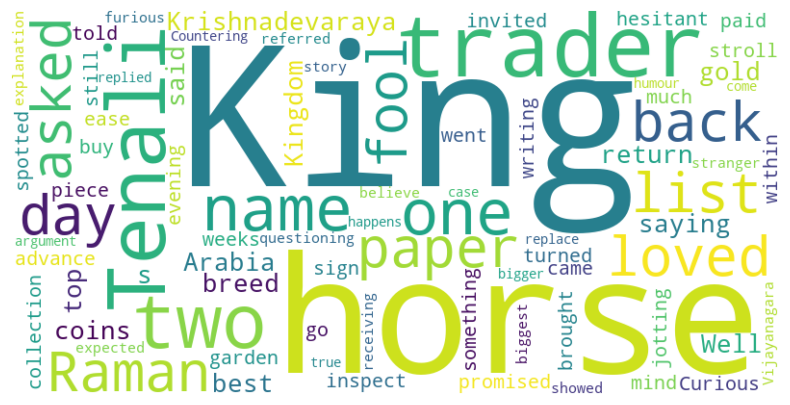

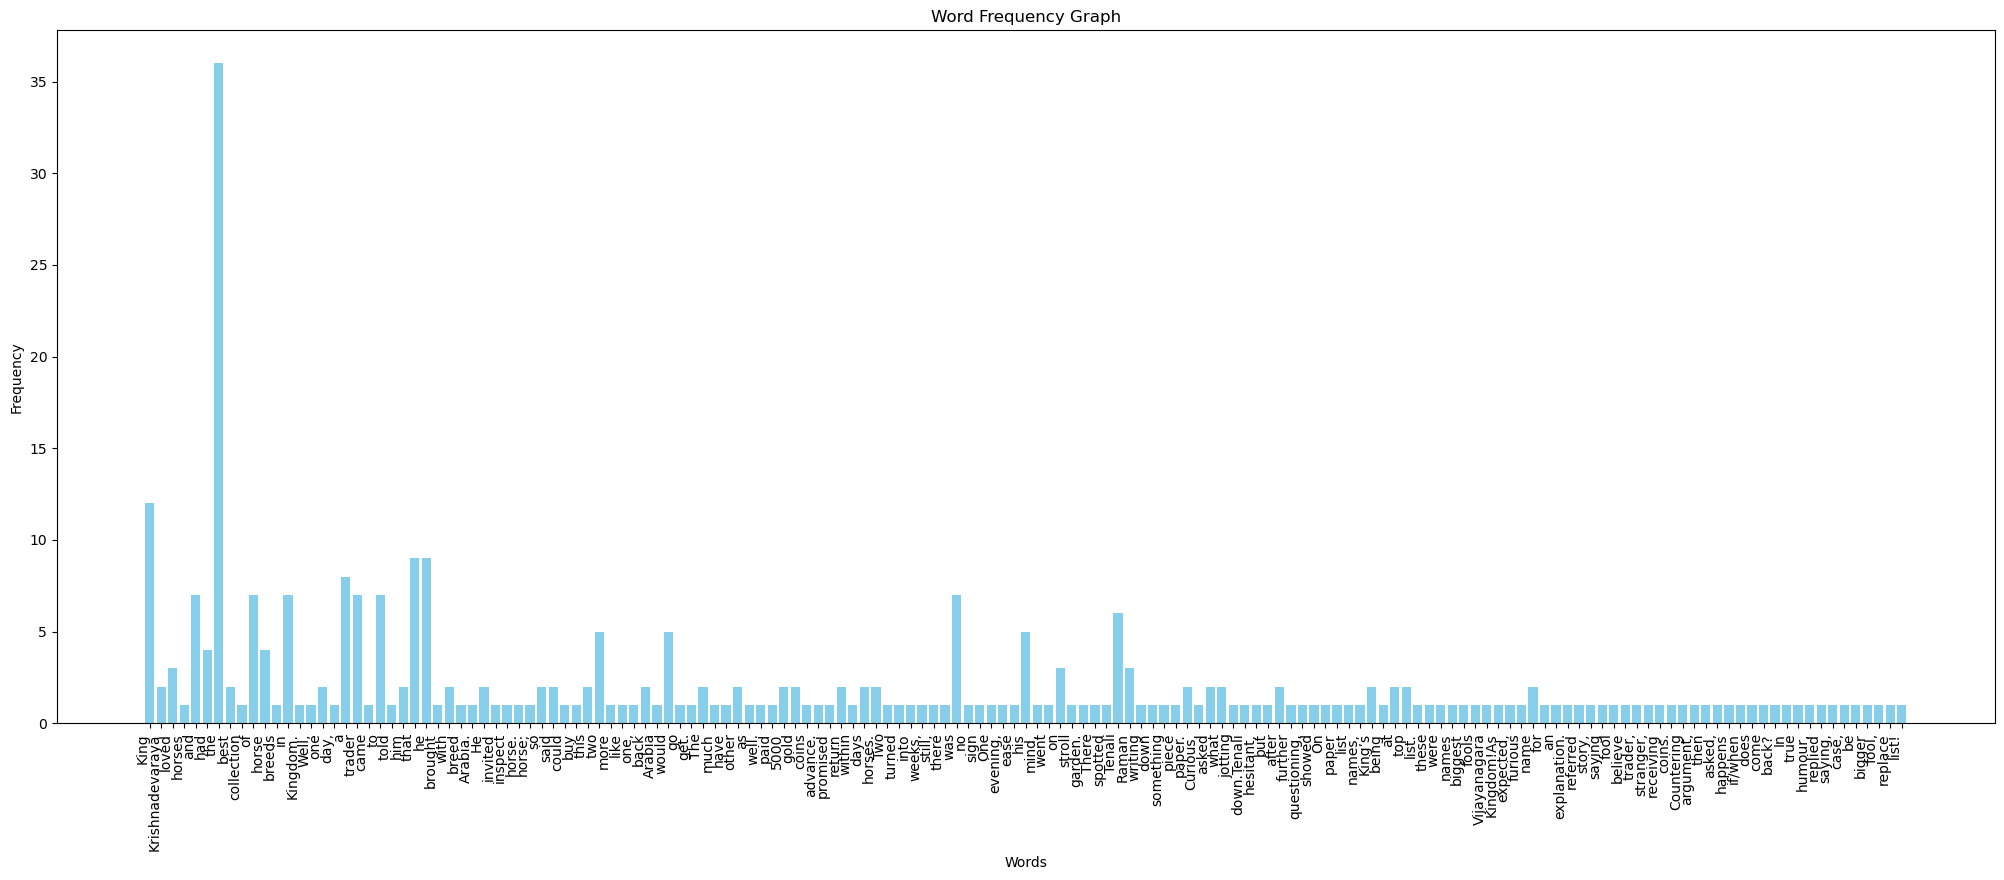

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def plot_frequency_graph(word_freq):
    # Plot frequency graph
    words = list(word_freq.keys())
    freq = list(word_freq.values())

    plt.figure(figsize=(25, 9))
    plt.bar(words, freq, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Graph')
    plt.xticks(rotation=90, ha='right')
    plt.show()

def main():
    # Input file path
    file_path = 'D:\\PythonVSC\\king.txt'  # Corrected file path

    # Read text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Generate word cloud
    generate_wordcloud(text)


    # Calculate word frequencies
    words = text.split()
    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1

    # Plot frequency graph
    plot_frequency_graph(word_freq)

if __name__ == "__main__":
    main()


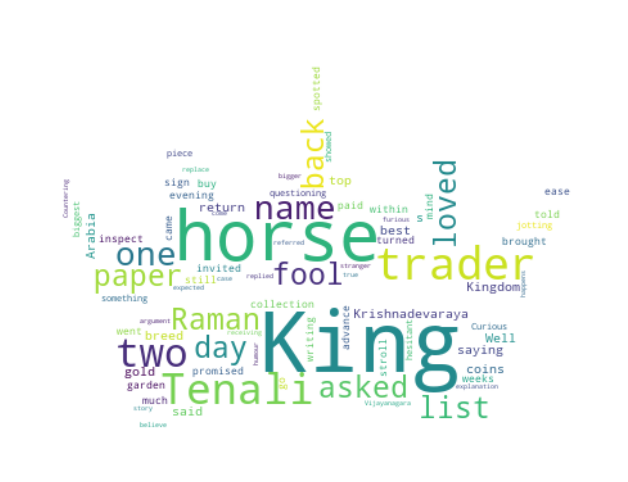

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

def generate_crown_wordcloud(text, crown_mask_path):
    # Load the crown-shaped mask image
    crown_mask = np.array(Image.open(crown_mask_path))

    # Create a WordCloud object with the custom shape mask
    wordcloud = WordCloud(mask=crown_mask, contour_width=0, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def main():
    # Input file path
    file_path = 'D:\\PythonVSC\\king.txt'

    # Read text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Crown-shaped mask image path
    crown_mask_path = 'D:\\crown.png'  # Replace with the actual path

    # Generate crown-shaped word cloud
    generate_crown_wordcloud(text, crown_mask_path)

if __name__ == "__main__":
    main()


In [11]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from collections import Counter
import re
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def get_ngram_distribution(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    ngram_freq_dist = Counter(n_grams)
    total_ngrams = sum(ngram_freq_dist.values())
    ngram_prob_dist = {gram: freq / total_ngrams for gram, freq in ngram_freq_dist.items()}
    return ngram_prob_dist

def get_tf_idf_distribution(texts):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    idf_values = tfidf_vectorizer.idf_
    word_idf_dict = dict(zip(feature_names, idf_values))
    return word_idf_dict
text = """
    King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom.
   Well,one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia.
   He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one,
   back in Arabia that he would go back to get.
   The King loved the horse so much that he had to have the other two as well.
   He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses.Two days turned into two weeks, and still,
   there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden.
   There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down.Tenali Raman was hesitant,
   but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list.
   Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom!As expected,
   the King was furious that his name was at the top and asked Tenali Raman for an explanation.
   Tenali referred to the horse story, saying the King was a fool to believe that the trader,
   a stranger, would return after receiving 5000 gold coins.Countering his argument,
   the King then asked, what happens if/when the trader does come back? In true Tenali humour,
   he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!
"""

preprocessed_text = preprocess_text(text)

tf_idf_distribution = get_tf_idf_distribution([preprocessed_text])
unigram_distribution = get_ngram_distribution(preprocessed_text, 1)
bigram_distribution = get_ngram_distribution(preprocessed_text, 2)
trigram_distribution = get_ngram_distribution(preprocessed_text, 3)

print("TF-IDF Distribution:")
for word, tfidf_score in tf_idf_distribution.items():
    print(f"{word}: {tfidf_score}")
print("\nUnigram Probability Distribution:")
for gram, prob in unigram_distribution.items():
    print(f"{gram}: {prob}")
print("\nBigram Probability Distribution:")
for gram, prob in bigram_distribution.items():
    print(f"{gram}: {prob}")
print("\nTrigram Probability Distribution:")
for gram, prob in trigram_distribution.items():
    print(f"{gram}: {prob}")


TF-IDF Distribution:
advance: 1.0
arabia: 1.0
argument: 1.0
asked: 1.0
back: 1.0
believe: 1.0
best: 1.0
bigger: 1.0
biggest: 1.0
breed: 1.0
breeds: 1.0
brought: 1.0
buy: 1.0
came: 1.0
case: 1.0
coins: 1.0
coinscountering: 1.0
collection: 1.0
come: 1.0
could: 1.0
curious: 1.0
day: 1.0
days: 1.0
downtenali: 1.0
ease: 1.0
evening: 1.0
expected: 1.0
explanation: 1.0
fool: 1.0
fools: 1.0
furious: 1.0
garden: 1.0
get: 1.0
go: 1.0
gold: 1.0
happens: 1.0
hesitant: 1.0
horse: 1.0
horses: 1.0
horsestwo: 1.0
humour: 1.0
ifwhen: 1.0
inspect: 1.0
invited: 1.0
jotting: 1.0
king: 1.0
kingdom: 1.0
kingdomas: 1.0
kings: 1.0
krishnadevaraya: 1.0
like: 1.0
list: 1.0
loved: 1.0
mind: 1.0
much: 1.0
name: 1.0
names: 1.0
one: 1.0
paid: 1.0
paper: 1.0
piece: 1.0
promised: 1.0
questioning: 1.0
raman: 1.0
receiving: 1.0
referred: 1.0
replace: 1.0
replied: 1.0
return: 1.0
said: 1.0
saying: 1.0
showed: 1.0
sign: 1.0
something: 1.0
spotted: 1.0
still: 1.0
story: 1.0
stranger: 1.0
stroll: 1.0
tenali: 1.0
told: 1.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harshit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harshit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

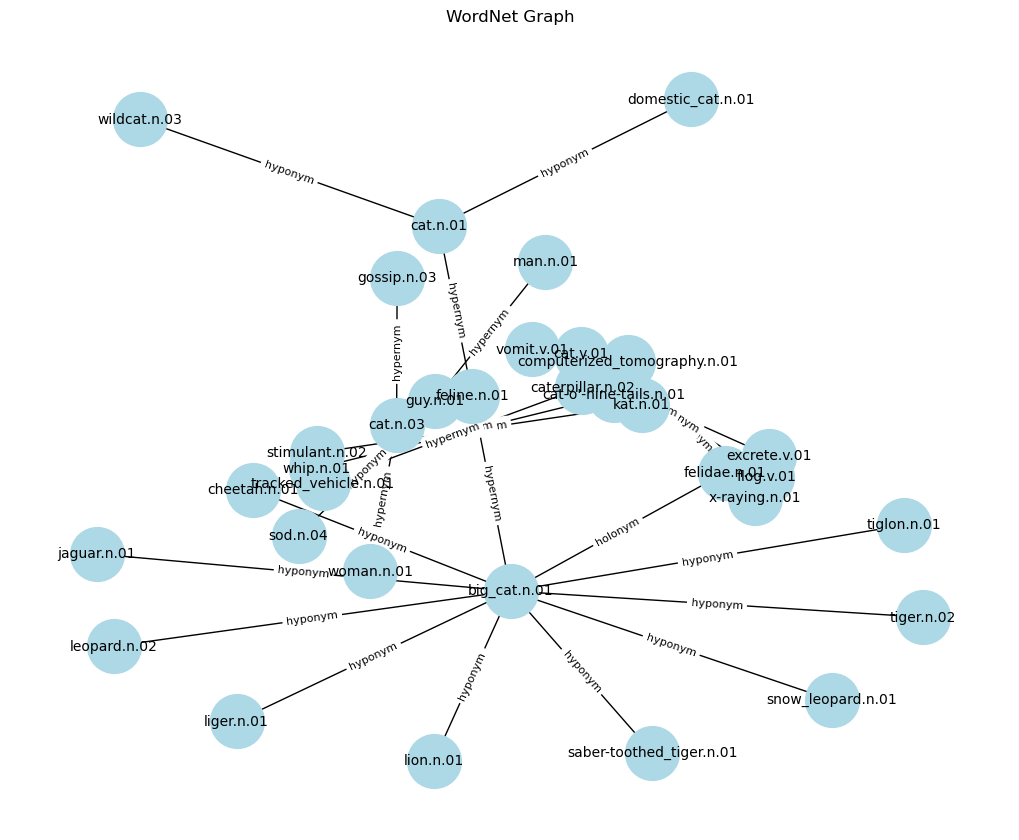

In [13]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt
import nltk

text = """
   cats
   """

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Create a graph
graph = nx.Graph()

# Add nodes for each unique word
for word in set(tokens):
    synsets = wn.synsets(word)
    if synsets:
        for synset in synsets:
            graph.add_node(synset.name(), label=synset.name().split('.')[0], definition=synset.definition())

# Add edges for hypernyms, hyponyms, meronyms, and holonyms
for word in set(tokens):
    synsets = wn.synsets(word)
    if synsets:
        for synset in synsets:
            for hypernym in synset.hypernyms():
                graph.add_edge(synset.name(), hypernym.name(), relation="hypernym")
            for hyponym in synset.hyponyms():
                graph.add_edge(synset.name(), hyponym.name(), relation="hyponym")
            for meronym in synset.member_meronyms():
                graph.add_edge(synset.name(), meronym.name(), relation="meronym")
            for holonym in synset.member_holonyms():
                graph.add_edge(synset.name(), holonym.name(), relation="holonym")

# Draw the graph
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
pos = nx.kamada_kawai_layout(graph)  # Use Kamada-Kawai layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, font_size=10, node_color='lightblue', font_color='black')
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): d["relation"] for u, v, d in graph.edges(data=True)},
                             font_size=8)
plt.title("WordNet Graph")
plt.show()
